<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/euler_runge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones diferenciales ordinarias. Problema del valor inicial

Resolver $\textbf{y}' = \textbf{F}(x, \textbf{y})$ con $\textbf{y}(a)=\alpha$

## Introducción

Una ecuación diferencial de  *primer orden* se escribe como :

$$
y' = f(x, y),
$$
donde $y'=\frac{dy}{dx}$ y $f(x, y)$ es una función dada.

La solución de la ecuación incluye una constante de integración arbitraria, que se da mediante una *condición auxiliar* especificada en $x=a$:
$$
y(a) = \alpha
$$

### EDO de orden  n



Formular el siguiente problema de valor inicial en la forma  $\textbf{y}'=\textbf{F}(x, \textbf{y})$:
$$
y'' = -0.1y'-x \quad ; \quad y(0) = 0 \quad y'(0) = 1
$$

#### Desarrollo

**Una ecuación diferencial (EDO) de orden $n$** se expresa como:
$$
y^{(n)} = f(x, y, y', y'', \ldots, y^{(n-1)})
$$
Que se puede transformae en un xonjunto de  n ecuaciones de primer orden utilizando un cambio de variables:
$$
y_0 = y \quad ; \quad y_1 = y' \quad ; \quad y_2 = y'' \quad ; \quad \ldots \quad ; \quad y_{n-1} = y^{(n-1)}
$$
Las ecuaciones diferenciales equivalentes de primer orden son:
$$
y_0' = y_1 \quad ; \quad y_1'=y_2 \quad ; \quad y_2'=y_3 \quad ; \quad \ldots \quad ; \quad y_n' = f(x, y_0, y_1, \ldots, y_{n-1}) 
$$

Necesitamos $n$ condiciones iniciales. Si estas condiciones se especifican para el mismo valor de  $x$, continuamos con un problema de **valor inicial**:
$$
y_0(a) = \alpha_0 \quad ; \quad y_1(a) = \alpha_1 \quad ; \quad y_2(a) = \alpha_2 \quad ; \quad \ldots \quad ; \quad y_{n-1}(a) = \alpha_{n-1}
$$
sai fuese de otra manera estaríamos hablando de un *problema de valors de frontera*. 

Una EDO de orden  $n$  se puede escribir en forma vectorial de la siguiente forma:
$$
\textbf{y}' = \textbf{F}(x, \textbf{y}) \quad ; \quad \textbf{y}(a) = \pmb{\alpha}
$$
Siendo
$$
\textbf{F}(x, \textbf{y}) = \begin{bmatrix}
y_1 \\
y_2 \\
\ldots \\
f(x, \textbf{y})
\end{bmatrix}
$$

##  Método de Euler

Se basa en una serie de  Taylor truncada de $\textbf{y}$ sobre x:
$$
\textbf{y}(x+h) \approx \textbf{y}(x) + \textbf{y}'(x)h \quad (\textbf{1})
$$
que nos da:
$$
\textbf{y}(x+h) \approx \textbf{y}(x) + \textbf{F}(x, \textbf{y})h
$$

Esta ecuación la utilizaremos para calcular $\textbf{y}$ **incrementalmente** desde $x=a$ a cualquier $x$ en pasos de tamaño $h$.

### Interpretación gráfica

<img src="https://drive.google.com/uc?id=1tGL-Ji_zVPu3wzXLbR29QcXQEXRnR4ot" alt="Lamp" width="420" height="320">




### Implementación

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
## module printSoln
''' printSoln(X,Y,freq).
    Imprime X e Y devueltos por cualquier método de
    resoluciçon de ecuaciones diferenciales.
        freq = n  imptime los valores en el paso nth.
        freq = 0 imprime unicamente los valores inicial y final.
'''
def printSoln(X,Y,freq):

    def printHead(n):
        print("\n        x  ",end=" ")
        for i in range (n):
            print("      y[",i,"] ",end=" ")
        print()

    def printLine(x,y,n):
        print("{:13.4e}".format(x),end=" ")
        for i in range (n):
            print("{:13.4e}".format(y[i]),end=" ")
        print()
    
    m = len(Y)
    try: n = len(Y[0])
    except TypeError: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)
    if i != m - 1: printLine(X[m - 1],Y[m - 1],n)


In [0]:
def euler(F, x0, y0, x, h):
    '''
    Retorna y(x) dado el problema de valor inicial:
    y' = F(x, y)
    y(x0) = y0 # condiciones iniciales
    h es el incremento de x utilizado en la integración
    F = [y'[0], y'[1], ..., y'[n-1]]
    y = [y[0], y[1], ..., y[n-1]]
    '''
    X = [] # almacenamos los valores  de x0 en cada iteración
    Y = [] # almacenamos los valores de y0 en cada iteración
    while x0 < x:
        h = min(h, x-x0)
        y0 = y0 + h*F(x0, y0)
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X), np.array(Y)

### Ejemplo 1

Integrar el sguiente problema de valor inicial:
$$
y' + 4y = x^2 \quad y(0) = 1
$$
en pasos de  $h=0.01$ desde $x=0$ a $0.03$. 

Determinar el error sabiendo que la solución analítica es :
$$
y = \frac{31}{32}e^{-4x}+\frac{1}{4}x^2-\frac{1}{8}x+\frac{1}{32}
$$

In [0]:
#la función se puede definir de esta manera
def F1(x, y):
    return x**2 - 4*y

In [0]:
X, Y = euler(F1, 0, np.array([1.0]), 0.03, 0.01)
printSoln(X,Y,0)


        x         y[ 0 ]  
   1.0000e-02    9.6000e-01 
   3.0000e-02    8.8474e-01 


In [0]:
#la función se puede definir también  de esta manera
def F2(x, y):
    F = np.zeros(1)
    F[0] =  x**2 - 4*y[0]
    return F

In [0]:
X, Y = euler(F2, 0, np.array([1.0]), 0.03, 0.01)
printSoln(X,Y,0)


        x         y[ 0 ]  
   1.0000e-02    9.6000e-01 
   3.0000e-02    8.8474e-01 


In [0]:
soluc = lambda x: 31/32*np.exp(-4*x)+1/4*x**2-1/8*x+1/32

In [0]:
errores = soluc(X)-Y
print (errores)

[[ 0.00078977 -0.03688104 -0.07307083]
 [ 0.03918877  0.00151796 -0.03467183]
 [ 0.07604881  0.038378    0.00218821]]


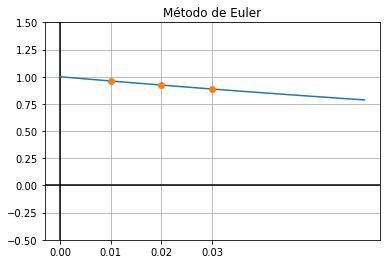

In [0]:

x_graf = np.linspace(0,0.06,100)
y_graf = soluc(x_graf)

#plt.figure(figsize = (5.5,2) )
bottom, top = -0.5,1.5  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top

plt.xticks(np.arange(0, 0.04, 0.01))
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Método de Euler')
plt.plot(x_graf,y_graf)
plt.plot(X,Y,'o')
plt.show()



### Ejemplo 2  (ecuación diferencial de orden 2)

Integrar el problema de valor inicial:
$$
y'' = -0.1y'-x \quad y(0) = 0 \quad y'(0) = 1
$$
desde $x=0$ to $2$ utilizando $h=0.05$. graficar $y$ con la solución analítica:
$$
y = 100x-5x^2+990(e^{-0.1x}-1)
$$

Con la notación $y_0 = y \,\,$y $\,\, y_1 = y'$
$$
\textbf{F}(x, \textbf{y}) = \begin{bmatrix}
y'_0 \\
y'_1 \\
\end{bmatrix} = \begin{bmatrix}
y_1 \\
-0.1y_1 -x\\
\end{bmatrix}\hspace{1cm}\textbf{y}(0) = \begin{bmatrix}
0 \\
1 
\end{bmatrix}
$$

In [0]:
def F(x, y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1]-x
    return F

In [0]:
X, Y = euler(F, 0, np.array([0, 1]), 2, 0.05)

In [0]:
printSoln(X,Y,5)


        x         y[ 0 ]        y[ 1 ]  
   5.0000e-02    5.0000e-02    9.9500e-01 
   3.0000e-01    2.9378e-01    9.3312e-01 
   5.5000e-01    5.1603e-01    8.1090e-01 
   8.0000e-01    7.0181e-01    6.2982e-01 
   1.0500e+00    8.3655e-01    3.9134e-01 
   1.3000e+00    9.0605e-01    9.6895e-02 
   1.5500e+00    8.9645e-01   -2.5214e-01 
   1.8000e+00    7.9424e-01   -6.5442e-01 
   2.0000e+00    6.3692e-01   -1.0137e+00 


In [0]:
soluc2 =  lambda x: 100*x-5*x**2+990*(np.exp(-0.1*x)-1)

In [0]:
errores = soluc2(X)-Y[:,0]
print(errores)

[-0.0001456  -0.00041459 -0.00080604 -0.00131905 -0.00195268 -0.00270605
 -0.00357825 -0.00456838 -0.00567556 -0.00689891 -0.00823754 -0.0096906
 -0.01125721 -0.01293651 -0.01472766 -0.01662981 -0.01864211 -0.02076373
 -0.02299384 -0.02533162 -0.02777623 -0.03032688 -0.03298275 -0.03574305
 -0.03860696 -0.04157371 -0.04464249 -0.04781254 -0.05108308 -0.05445333
 -0.05792254 -0.06148993 -0.06515475 -0.06891626 -0.07277371 -0.07672635
 -0.08077345 -0.08491429 -0.08914814 -0.09347427]


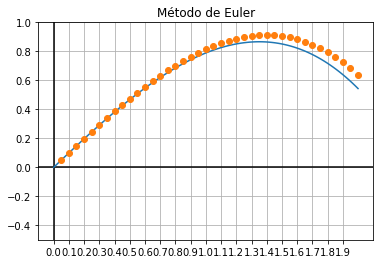

In [0]:
x_graf = np.linspace(0,2,100)
y_graf = soluc2(x_graf)

#plt.figure(figsize = (5.5,2) )
bottom, top = -0.5,1  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top

plt.xticks(np.arange(0,2, 0.1))
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Método de Euler')
plt.plot(x_graf,y_graf)
plt.plot(X,Y[:,0],'o')
plt.show()

## Método de Runge-Kutta de segundo orden

Se define por la siguiente iteración:
$$
\textbf{y}(x+h) = \textbf{y}(x) + h\textbf{F}\left[x+\frac{h}{2}, \textbf{y}\left(x+\frac{h}{2}\right)\right]
$$
Donde:
$$
\textbf{y}\left(x+\frac{h}{2}\right) = \textbf{y}(x) + \frac{h}{2}\textbf{F}(x, \textbf{y})
$$
Lo que nos da:
$$
\textbf{y}(x+h) = \textbf{y}(x) + h\textbf{F}\left[x+\frac{h}{2}, \textbf{y}+\frac{h}{2}\textbf{F}(x, \textbf{y})\right]
$$


Utilizaremos la siguiente notación:

* $\textbf{k}_0 = \textbf{F}(x, \textbf{y})$: derivada de $\textbf{y}'$ en $x$.
* $\textbf{k}_1 = \textbf{F}\left(x+\frac{h}{2}, \textbf{y}+\frac{h}{2}\textbf{k}_0\right)$: derivada de $\textbf{y}'$ en $x+\frac{h}{2}$, donde $\textbf{y}\left(x+\frac{h}{2}\right)$ estimación $\textbf{y}(x)$ utilizando una extrapolación lineal de la pendiente  $\textbf{k}_0$.
* $\textbf{y}(x+h) = y(x) + h\textbf{k}_1$

### Interpretaciòn gráfica

<img src="https://drive.google.com/uc?id=1ZE4W4stzNthHSTfCPP9AIK6ATwargFGB" alt="Lamp" width="420" height="320">



### Notas
* En las transparencias utilizamos $\textbf{K}_i$, con $\textbf{K}_i=h\textbf{k}_i$  (es lo mismo)
* Existen otros métodos de integración de Runge-Kutta, donde $k_1$ no se calcula en $\frac{h}{2}$, y $\textbf{y}(x+h)$ incluye una combinación lineal de $k_0$ and $k_1$. Nosotros nos quedamos con el método de *Euler modificado*, que es el más utilizado.

### Implementación

In [0]:
def runge_kutta_2(F, x0, y0, x, h):
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        k0 = F(x0, y0)
        k1 = F(x0+h/2, y0 + h/2*k0)
        y0 = y0 + h*k1
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X), np.array(Y)

### El mismo ejemplo 2. Comparación Euler-Runge-Kutta

In [0]:
def F(x, y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1]-x
    return F

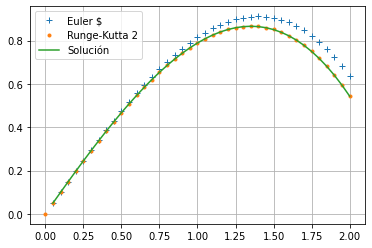

In [0]:

X, Y = euler(F, 0, np.array([0, 1]), 2, 0.05)
X1, Y1 = runge_kutta_2(F, 0, np.array([0, 1]), 2, 0.05)
plt.grid(True)
plt.plot(X, Y[:,0], '+')
plt.plot(X1, Y1[:,0], '.')
plt.plot(X, 100*X-5*X**2+990*(np.exp(-0.1*X)-1))
plt.legend(['Euler $',
           'Runge-Kutta 2',
           'Solución'])
plt.show()

## Runge-Kutta de 4to Orden

Como en el método de segundo orden , $\textbf{y}(x+h)$ se estima a partir de una extrapolación lineal de  $\textbf{y}(x+h)$:
$$
\textbf{y}(x+h) = \textbf{y}(x) + h \frac{1}{6}\left(\textbf{k}_0 + 2\textbf{k}_1 + 2\textbf{k}_2 + \textbf{k}_3\right)
$$

La diferencia principal con el método de segundo orden, es que la pendiente utilizada en la extrapolación lineal se calcula mediante una suma ponderada de 4 pendientes: 
* $\textbf{k}_1$ y $\textbf{k}_2$, se estiman en $x+\frac{h}{2}$,
* $\textbf{k}_0$ y $\textbf{k}_3$ se estiman en los extremos, $x$ y $x+h$. 

### Fórmulas para  $\textbf{k}_i$:

* $\textbf{k}_0$ = $\textbf{F}(x, \textbf{y})$
* $\textbf{k}_1$ = $\textbf{F}\left(x+\frac{h}{2}, \textbf{y} + \frac{h}{2}\textbf{k}_0\right)$
* $\textbf{k}_2$ = $\textbf{F}\left(x+\frac{h}{2}, \textbf{y} + \frac{h}{2}\textbf{k}_1\right)$
* $\textbf{k}_3$ = $\textbf{F}\left(x+h, \textbf{y} + h\textbf{k}_2\right)$

### Representación gráfica

<img src="https://drive.google.com/uc?id=1bhhdOZb8taN9DlYZvNfsT-UwC_K7Q_vQ" alt="Lamp" width="420" height="320">  

### Implementación 

In [0]:
def runge_kutta_4(F, x0, y0, x, h):
    '''
    Retorna y(x) dado el siguiente problema de valor inicial:
    y' = F(x, y)
    y(x0) = y0 # condiciones iniciales
    h es el incremento de x utilizado en la integración
    F = [y'[0], y'[1], ..., y'[n-1]]
    y = [y[0], y[1], ..., y[n-1]]
    '''
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        k0 = F(x0, y0)
        k1 = F(x0+h/2.0, y0 + h/2.0*k0)
        k2 = F(x0 + h/2.0, y0 + h/2*k1)
        k3 = F(x0+h, y0+h*k2)
        y0 = y0 + h/6.0*(k0+2*k1+2.0*k2+k3)
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X), np.array(Y)

### Nuevamente el ejemplo 2

In [0]:
# otra forma de definir la función
def F(x, y):
    return np.array([
                    y[1],
                    -0.1*y[1]-x
                ])

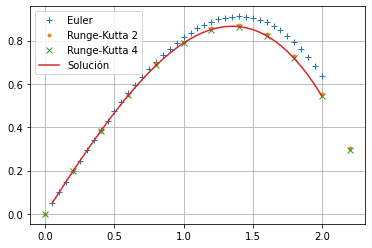

In [0]:
X, Y = euler(F, 0, np.array([0, 1]), 2, 0.05)
X1, Y1 = runge_kutta_2(F, 0, np.array([0, 1]), 2, 0.2)
X2, Y2 = runge_kutta_4(F, 0,np.array([0.0, 1.0]), 2.0, 0.2)
plt.grid(True)
plt.plot(X, Y[:,0], '+')
plt.plot( X1, Y1[:,0], '.')
plt.plot(X2, Y2[:,0], 'x')
plt.plot(X, 100.0*X-5.0*X**2+990.0*(np.exp(-0.1*X)-1.0))
plt.legend(['Euler ',
           'Runge-Kutta 2',
            'Runge-Kutta 4',
           'Solución'])
plt.show()